In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [22]:
# Get the stock symbols / tickers in the portfolio
assets = ["SBIN.NS", "IRCTC.NS", "DLF.NS", "CDSL.NS", "BDL.NS"]

In [5]:
# Assign weights to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])


In [7]:
from datetime import datetime

today = datetime.today().strftime('%Y-%m-%d')


In [19]:
# Get the stock / portfolio starting and ending date
stockStartDate = "2023-01-01"
stockEndDate = "31-01-2025"

In [10]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import yfinance as yf

In [24]:
# Fetch adjusted closing prices for the selected assets
df = yf.download(assets, start=stockStartDate)["Adj Close"]


[*********************100%***********************]  5 of 5 completed


In [25]:
df.head()

Ticker,BDL.NS,CDSL.NS,DLF.NS,IRCTC.NS,SBIN.NS
Date,,,,,
2023-01-02 00:00:00+00:00,463.235443,565.390869,375.029816,628.684326,590.625610
2023-01-03 00:00:00+00:00,462.867767,564.143433,374.931183,630.348145,590.818604
2023-01-04 00:00:00+00:00,461.078369,555.044373,366.841614,621.686523,583.872253
2023-01-05 00:00:00+00:00,460.440979,551.693359,367.729492,623.595093,583.775757
2023-01-06 00:00:00+00:00,459.411499,546.581238,364.769897,622.714233,579.482666


In [26]:
df.tail(10)

Ticker,BDL.NS,CDSL.NS,DLF.NS,IRCTC.NS,SBIN.NS
Date,,,,,
2025-02-05 00:00:00+00:00,1210.983887,1348.849976,763.400024,791.900024,766.049988
2025-02-06 00:00:00+00:00,1208.293091,1328.050049,764.049988,783.799988,752.250000
2025-02-07 00:00:00+00:00,1196.284546,1336.199951,757.450012,774.099976,737.200012
2025-02-10 00:00:00+00:00,1195.287964,1297.599976,730.950012,773.700012,736.799988
2025-02-11 00:00:00+00:00,1133.201416,1239.900024,709.099976,750.950012,731.099976
2025-02-12 00:00:00+00:00,1132.703247,1235.699951,680.049988,759.150024,733.150024
2025-02-13 00:00:00+00:00,1162.699951,1227.000000,680.650024,746.349976,727.650024
2025-02-14 00:00:00+00:00,1102.550049,1205.300049,673.299988,732.599976,722.150024
2025-02-17 00:00:00+00:00,1071.900024,1206.949951,674.750000,725.450012,727.700012


<Figure size 1200x600 with 0 Axes>

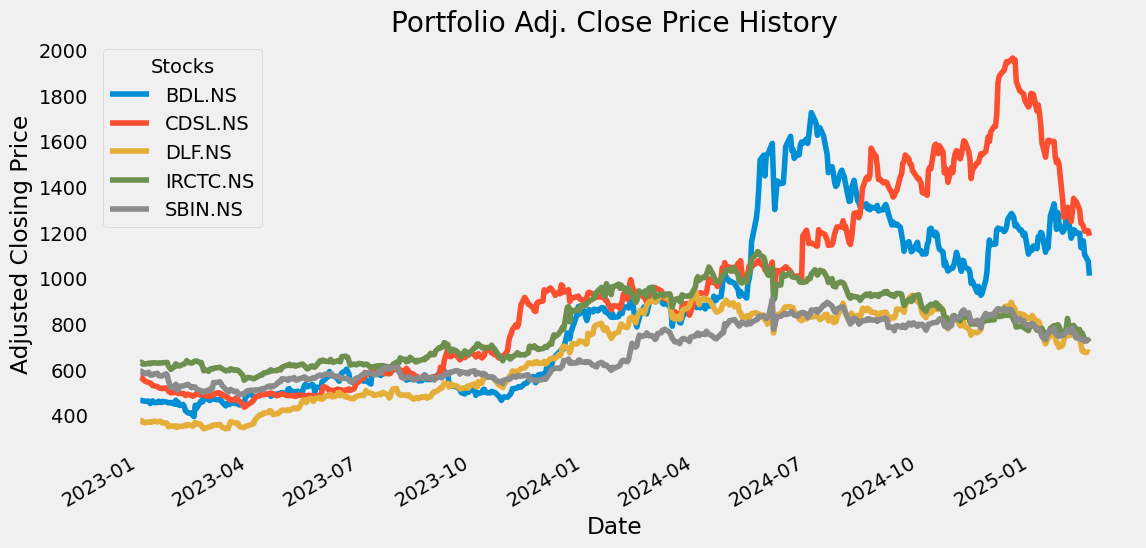

In [30]:
# Plot the stock prices
plt.figure(figsize=(12,6))
df.plot(figsize=(12,6), title="Portfolio Adj. Close Price History")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.legend(title="Stocks")
plt.grid()
plt.show()


In [31]:
# Calculate daily returns
daily_returns = df.pct_change()

# Display the first few rows
print(daily_returns.head())


Ticker                       BDL.NS   CDSL.NS    DLF.NS  IRCTC.NS   SBIN.NS
Date                                                                       
2023-01-02 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN
2023-01-03 00:00:00+00:00 -0.000794 -0.002206 -0.000263  0.002647  0.000327
2023-01-04 00:00:00+00:00 -0.003866 -0.016129 -0.021576 -0.013741 -0.011757
2023-01-05 00:00:00+00:00 -0.001382 -0.006037  0.002420  0.003070 -0.000165
2023-01-06 00:00:00+00:00 -0.002236 -0.009266 -0.008048 -0.001413 -0.007354


In [32]:
# Compute the covariance matrix of daily returns
cov_matrix = daily_returns.cov()

# Annualize the covariance matrix
annualized_cov_matrix = cov_matrix * 252

'# Display the covariance matrix
print("Annualized Covariance Matrix:")
print(annualized_cov_matrix)

Annualized Covariance Matrix:
Ticker      BDL.NS   CDSL.NS    DLF.NS  IRCTC.NS   SBIN.NS
Ticker                                                    
BDL.NS    0.207996  0.047865  0.043266  0.059356  0.031900
CDSL.NS   0.047865  0.148468  0.047156  0.040108  0.030530
DLF.NS    0.043266  0.047156  0.096103  0.043461  0.040463
IRCTC.NS  0.059356  0.040108  0.043461  0.084092  0.031409
SBIN.NS   0.031900  0.030530  0.040463  0.031409  0.063994


In [33]:
# Compute portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(annualized_cov_matrix, weights))

print(f"Portfolio Variance: {portfolio_variance:.6f}")

Portfolio Variance: 0.057267


In [41]:
# Compute portfolio volatility (standard deviation)
portfolio_volatility = np.sqrt(portfolio_variance)

In [42]:
print(f"Portfolio Volatility (Standard Deviation): {portfolio_volatility:.6f}")

Portfolio Volatility (Standard Deviation): 0.239306


In [43]:
# Compute mean daily return for each stock
mean_daily_returns = daily_returns.mean()

In [44]:
# Annualize the returns (mean daily return * 252)
portfolio_annual_return = np.sum(mean_daily_returns * weights) * 252


In [45]:
print(f"Annual Portfolio Return: {portfolio_annual_return:.6f}")

Annual Portfolio Return: 0.293905


In [48]:
# Show the expected annual return, volatility (risk), and varience
# Convert to percentages
percent_var = str(round(portfolio_variance * 100, 2)) + "%"
percent_vols = str(round(portfolio_volatility * 100, 2)) + "%"
percent_ret = str(round(portfolio_annual_return * 100, 2)) + "%"

In [50]:
# Print results
print("📈 Expected Annual Return: " + percent_ret)
print("⚡ Expected Volatility (Risk): " + percent_vols)
print("📊 Expected Variance: " + percent_var)

📈 Expected Annual Return: 29.39%
⚡ Expected Volatility (Risk): 23.93%
📊 Expected Variance: 5.73%


In [54]:
pip install PyPortfolioOpt

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/62.7 kB ? eta -:--:--
   ---------------------------------------- 62.7/62.7 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.1 MB 4.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.1 MB 2.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 3.4 MB/s eta 0:00:01
   ------------------------------------- -- 1.0/1.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.2 kB ? eta -:--:--
   ---------------------------------------- 72.2/72.2 kB 3.9 MB/s eta 0:00:00
   --------------------------------

In [55]:
# importing lib for optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [56]:
# Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu= expected_returns.mean_historical_return(df) #expected returns
S=risk_models.sample_cov(df) #Covariance matrix

In [57]:
mu.head()

Ticker
BDL.NS      0.452612
CDSL.NS     0.425230
DLF.NS      0.322469
IRCTC.NS    0.066564
SBIN.NS     0.103775
dtype: float64

In [58]:
S.head()

Ticker,BDL.NS,CDSL.NS,DLF.NS,IRCTC.NS,SBIN.NS
Ticker,,,,,
BDL.NS,0.207996,0.047865,0.043266,0.059356,0.031900
CDSL.NS,0.047865,0.148468,0.047156,0.040108,0.030530
DLF.NS,0.043266,0.047156,0.096103,0.043461,0.040463
IRCTC.NS,0.059356,0.040108,0.043461,0.084092,0.031409
SBIN.NS,0.031900,0.030530,0.040463,0.031409,0.063994


In [66]:
# Optimize for max sharpe ratio
# Create Efficient Frontier object
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict({'BDL.NS': 0.2717, 'CDSL.NS': 0.36446, 'DLF.NS': 0.36383, 'IRCTC.NS': 0.0, 'SBIN.NS': 0.0})
Expected annual return: 39.5%
Annual volatility: 28.0%
Sharpe Ratio: 1.41


(0.39528193974239983, 0.2798897725197812, 1.4122771839205497)

In [67]:
print(cleaned_weights)

OrderedDict({'BDL.NS': 0.2717, 'CDSL.NS': 0.36446, 'DLF.NS': 0.36383, 'IRCTC.NS': 0.0, 'SBIN.NS': 0.0})


In [68]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
portfolio_value = 1000000  # Change this to your actual investment amount

latest_prices = get_latest_prices(df)  # Get the most recent stock prices
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=portfolio_value)
allocation, leftover_cash = da.lp_portfolio()

print("\nDiscrete Allocation of Shares:")
for stock, num_shares in allocation.items():
    print(f"{stock}: {num_shares} shares")

print(f"\nLeftover Cash: ₹{leftover_cash:.2f}")




Discrete Allocation of Shares:
BDL.NS: 269 shares
CDSL.NS: 307 shares
DLF.NS: 542 shares

Leftover Cash: ₹415.30
